In [1]:
#library
import numpy as np
import tensorflow as tf

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

np.random.seed(0)
tf.set_random_seed(0)

In [2]:
#data
from sklearn import datasets

mnist = datasets.fetch_mldata('MNIST original', data_home=".")
n = len(mnist.data)
N = 10000
indices = np.random.permutation(range(n))[:N]
X = mnist.data[indices]
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]

In [3]:
#train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=0)

In [4]:
#architecture
n_in = len(X[0])
n_hiddens = [100 ,100]
n_out = len(Y[0])

In [5]:
def inference(x, keep_prob, n_in, n_hiddens, n_out):
    
    def weight_variable(shape):
        initial = tf.truncated_normal(shape, stddev=0.01)
        return tf.Variable(initial)
    
    def bias_variable(shape):
        initial = tf.zeros(shape)
        return tf.Variable(initial)
    
    for i, n_hidden in enumerate(n_hiddens):
        if i==0:
            input = x
            input_dim = n_in
        else:
            input = output
            input_dim = n_hiddens[i-1]
            
        W = weight_variable([input_dim,n_hidden])
        b = bias_variable([n_hidden])
        
        h = tf.nn.sigmoid( tf.matmul(input,W) + b )
        output = tf.nn.dropout(h, keep_prob)
        
    W_out = weight_variable([n_hiddens[-1],n_out])
    b_out = bias_variable([n_out]) 
    y = tf.nn.softmax( tf.matmul(output,W_out) + b_out )
    
    return y

In [6]:
x = tf.placeholder(tf.float32, shape=[None,n_in])
t = tf.placeholder(tf.float32, shape=[None,n_out])
keep_prob = tf.placeholder(tf.float32)

y = inference(x, keep_prob, n_in=n_in, n_hiddens=n_hiddens, n_out=n_out)

In [7]:
def loss(y,t):
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(t*tf.log(y),reduction_indices=[1]))
    return cross_entropy

In [8]:
def training(loss):
    optimizer = tf.train.GradientDescentOptimizer(0.1)
    train_step = optimizer.minimize(loss)
    return train_step

In [9]:
train_step = training(loss(y,t))

In [10]:
epochs = 100
batch_size = 100
n_batches = N // batch_size

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [12]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(t,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [13]:
for epoch in range(epochs):
    X_, Y_ = shuffle(X_train, Y_train, random_state=0)
    #print(epoch)
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end],
            keep_prob: 0.5
        })
    if epoch % 10 == 0:
        print("epoch=%d, accuracy=%g" % (epoch, sess.run(accuracy, feed_dict={ x: X_test, t: Y_test, keep_prob: 1.0 } )))

epoch=0, accuracy=0.118
epoch=10, accuracy=0.669
epoch=20, accuracy=0.746
epoch=30, accuracy=0.797
epoch=40, accuracy=0.814
epoch=50, accuracy=0.849
epoch=60, accuracy=0.8585
epoch=70, accuracy=0.8615
epoch=80, accuracy=0.8505
epoch=90, accuracy=0.864


In [14]:
val_prediction = tf.argmax(y,1)

In [15]:
X_, Y_ = shuffle(X_test, Y_test)
classfied = correct_prediction.eval(session=sess, feed_dict={
    x: X_[0:5],
    t: Y_[0:5],
    keep_prob: 1.0
})
prob = y.eval(session=sess, feed_dict={
    x:X_[0:5],
    keep_prob: 1.0
})
val = val_prediction.eval(session=sess, feed_dict={
    x:X_[0:5],
    keep_prob: 1.0
})

In [16]:
print(classfied)
print(prob)
print(val)
print(Y_[0:5])

[ True  True  True  True  True]
[[  1.60266882e-05   5.01151988e-03   2.78346776e-03   2.02979296e-02
    1.63059996e-03   2.85071861e-02   2.83694040e-04   2.13489751e-04
    9.33442831e-01   7.81332143e-03]
 [  2.36753311e-10   9.94065881e-01   1.69644260e-03   1.22322456e-03
    1.12848365e-05   1.91003001e-05   4.33657442e-06   2.85855116e-04
    2.67267390e-03   2.11224942e-05]
 [  2.22353833e-08   9.66174006e-01   1.14764608e-02   4.64501558e-03
    4.39441610e-05   3.12752090e-04   1.31983892e-04   2.49512057e-04
    1.69129446e-02   5.33610073e-05]
 [  8.38743709e-03   6.21106155e-05   4.34478521e-02   1.31464345e-04
    3.62211862e-03   2.61107739e-02   9.15596783e-01   8.22209074e-07
    2.52073910e-03   1.20000142e-04]
 [  5.38517452e-05   2.54640490e-05   8.71848594e-03   3.02148464e-06
    4.14519804e-03   2.74561252e-03   9.83702779e-01   4.06402592e-08
    5.70431876e-04   3.50019836e-05]]
[8 1 1 6 6]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  

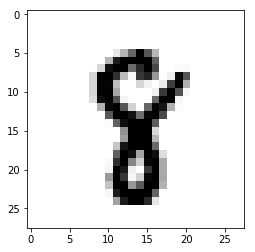

In [17]:
from matplotlib import pyplot as plt
from matplotlib import cm
plt.imshow(X_[0].reshape(28, 28), cmap=cm.gray_r)
plt.show()

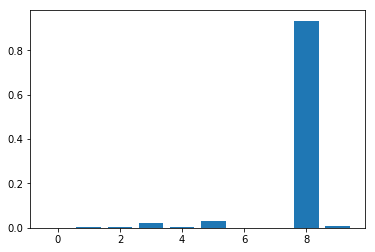

In [18]:
plt.bar(range(10),prob[0])
plt.show()